In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf

In [51]:
#data path
DATADIR ="/home/tasneem/Downloads/PH2.16 (copy)/train"

#DATADIR = "/home/tasneem/Downloads/derma_disease_dataset/dataset/train"


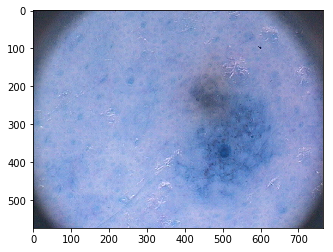

In [52]:
#classes
CATEGORIES = ["Atypical Nevus","Common Nevus","Melanoma"]
#CATEGORIES = ["melanoma","nevus",'seborrheic_keratosis']

#this section for testing join path succefully- shold apear an image after run it

for category in CATEGORIES: #for every class 
    path = os.path.join(DATADIR,category)  # create path to Atypical Nevus,Common Nevus and Melanoma
    for img in os.listdir(path):  # iterate over each image per each class
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!
        #RGB_img=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #plt.imshow(RGB_img)  # graph it
        #plt.show() 

        break  # only one image to show
    break  

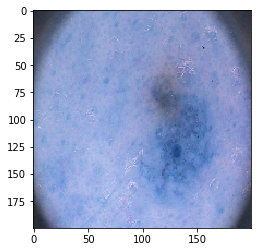

[[[50 48 56]
  [55 48 58]
  [58 46 58]
  ...
  [47 46 53]
  [57 51 58]
  [54 47 53]]

 [[36 45 64]
  [35 44 60]
  [44 52 64]
  ...
  [47 46 61]
  [56 53 64]
  [54 47 54]]

 [[45 45 63]
  [45 46 59]
  [40 47 55]
  ...
  [47 47 61]
  [48 49 62]
  [56 50 63]]

 ...

 [[35 45 58]
  [36 48 60]
  [32 48 58]
  ...
  [42 53 63]
  [43 54 66]
  [50 54 69]]

 [[38 47 60]
  [43 47 64]
  [40 48 64]
  ...
  [43 58 61]
  [40 55 63]
  [47 56 69]]

 [[36 46 63]
  [35 46 66]
  [29 46 64]
  ...
  [41 51 67]
  [44 53 70]
  [46 56 70]]]
(200, 200, 3)


In [53]:
#resize the image

IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()# it will show the image in the size that written above
print(new_array)#print the array of image pixels
print(new_array.shape)#print the shape of the image

In [54]:

# make train set
training_data = []

def create_training_data():
    for category in CATEGORIES:  #for every class

        path = os.path.join(DATADIR,category)  # create path to Atypical Nevus,Common Nevus and Melanoma
        class_num = CATEGORIES.index(category)  # get the classification(0 or a 1 or 2). 0=Atypical Nevus 1=Common Nevus 2=Melanoma

        for img in tqdm(os.listdir(path)):  # iterate over each image per each class
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                #RGB_img=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # to keep the output clean...
                pass
            
            
create_training_data()
#print the number of samples
print(len(training_data))

100%|██████████| 35/35 [00:00<00:00, 1151.61it/s]

180


In [55]:
#shuffling the data
import random

random.shuffle(training_data)#because of our data is orgnized so we need it

In [56]:
#now print the first 10 labels
for sample in training_data[:10]:
    print(sample[1])#after shuffle it should be not orgized
     

2
0
0
1
2
1
0
2
1
0


In [57]:

#making features and labels lists
X = []
y = []

for features,label in training_data: #features means images or samples
    X.append(features)
    y.append(label)
    
#print images list    
print(X[0])
print('--------------------')
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))
print('--------------------')
#convert images list to numpy array and print it
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(X[0])
print('--------------------')




# confirm the data type
print('Data Type: %s' % X.dtype)
print('--------------------')

# confirm pixel range is 0-255
print('Min: %.3f, Max: %.3f' % (X.min(), X.max()))
print('--------------------')

# calculate  the global mean and standard deviation
mean, std = X.mean(), X.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('--------------------')

# centering of pixels(subtract mean)
X = X - mean

# normalize 
X = X/255.0


# confirm the normalization
print('Min: %.3f, Max: %.3f' % (X.min(), X.max()))
print('--------------------')

# calculate global mean and standard deviation after centring the pixels
mean, std = X.mean(), X.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('--------------------')

#print the array to see the pixel values after changes
print(X[0])


[[[ 43  41  41]
  [ 45  40  41]
  [ 45  39  44]
  ...
  [ 44  37  40]
  [ 46  40  41]
  [ 44  38  39]]

 [[ 67  59  66]
  [ 64  56  65]
  [ 68  58  70]
  ...
  [117  96 108]
  [115  95 104]
  [106  85  92]]

 [[ 63  52  61]
  [ 64  52  63]
  [ 62  52  64]
  ...
  [110  86 101]
  [105  82  94]
  [101  80  89]]

 ...

 [[ 68  58  70]
  [ 64  56  69]
  [ 61  54  67]
  ...
  [ 65  56  69]
  [ 67  59  70]
  [ 64  56  66]]

 [[ 63  58  69]
  [ 64  57  69]
  [ 63  59  71]
  ...
  [ 66  58  68]
  [ 66  57  68]
  [ 66  58  68]]

 [[ 99  96 102]
  [ 92  88  94]
  [ 99  92  99]
  ...
  [ 46  38  45]
  [ 45  38  43]
  [ 47  40  45]]]
--------------------
[[[[ 43  41  41]
   [ 45  40  41]
   [ 45  39  44]
   ...
   [ 44  37  40]
   [ 46  40  41]
   [ 44  38  39]]

  [[ 67  59  66]
   [ 64  56  65]
   [ 68  58  70]
   ...
   [117  96 108]
   [115  95 104]
   [106  85  92]]

  [[ 63  52  61]
   [ 64  52  63]
   [ 62  52  64]
   ...
   [110  86 101]
   [105  82  94]
   [101  80  89]]

  ...

  [[ 68  

In [58]:

#save the data after preprocessing
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


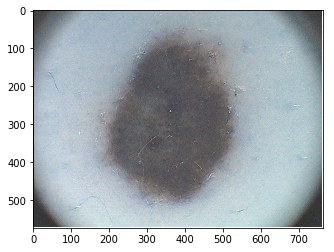

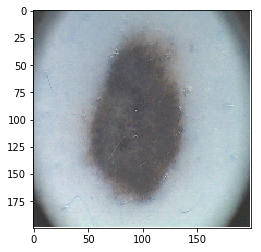

100%|██████████| 5/5 [00:00<00:00, 730.84it/s]

--------------------
number of images in test set
20
--------------------
1
1
2
1
0
2
0
1
0
0
[[[[61 54 69]
   [63 56 70]
   [76 68 75]
   ...
   [45 40 50]
   [46 49 54]
   [49 50 55]]

  [[47 50 66]
   [49 53 65]
   [61 60 72]
   ...
   [45 50 56]
   [44 52 60]
   [41 44 50]]

  [[54 56 66]
   [54 57 69]
   [55 58 71]
   ...
   [47 52 64]
   [44 47 58]
   [46 47 54]]

  ...

  [[54 62 80]
   [48 53 72]
   [49 55 72]
   ...
   [50 52 74]
   [42 48 65]
   [42 48 62]]

  [[46 54 73]
   [48 56 75]
   [49 51 77]
   ...
   [44 48 65]
   [45 51 67]
   [40 45 54]]

  [[51 53 73]
   [44 44 65]
   [47 55 72]
   ...
   [15 11 27]
   [14 10 22]
   [16 15 22]]]]
Data Type: uint8
--------------------
Min: 0.000, Max: 255.000
--------------------
Mean: 155.940, Standard Deviation: 62.493
Min: -0.612, Max: 0.388
--------------------
Mean: -0.000, Standard Deviation: 0.245
--------------------
[[[-0.37231424 -0.39976522 -0.34094169]
  [-0.3644711  -0.39192208 -0.33702012]
  [-0.31349071 -0.34486326 -

In [59]:
#making test set following the same steps

DATADIR ="/home/tasneem/Downloads/PH2.16 (copy)/test"
CATEGORIES = ["Atypical Nevus","Common Nevus","Melanoma"]
#DATADIR = "/home/tasneem/Downloads/derma_disease_dataset/dataset/test"
#CATEGORIES = ["melanoma","nevus","seborrheic_keratosis"]

#testing join path succefully- shold apear an image after run it

for category in CATEGORIES:  # do melanoma and nevi
    path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
    for img in os.listdir(path):  # iterate over each image per melanoma and nevi
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!
        #RGB_img=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #plt.imshow(img_array)  # graph it
        #plt.show()

        break  
    break  
    
#resizing    
IMG_SIZE = 200
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show() # it will show the image in the size i written above

# make test list
testing_data = []

def create_testing_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create the path 
        class_num = CATEGORIES.index(category)  # get the classification 

        for img in tqdm(os.listdir(path)):  # iterate over each image per class
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                #RGB_img=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])  # add this to our testing_data
            except Exception as e:  
                pass
            
create_testing_data()
print('--------------------')
print('number of images in test set')
print(len(testing_data))
print('--------------------')

import random
random.shuffle(testing_data)#shuffling

for sample in testing_data[:10]:
    print(sample[1])#after shuffle it should be not orgized
    
X_test = []
y_test = []

for features,label in testing_data: 
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

#convert to numpy array
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)



# confirm data type
print('Data Type: %s' % X_test.dtype)
print('--------------------')

# confirm pixel range is 0-255
print('Min: %.3f, Max: %.3f' % (X_test.min(), X_test.max()))
print('--------------------')

# calculate  the global mean and standard deviation
mean, std = X_test.mean(), X_test.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

#pixel centering(subtract mean)
X_test = X_test - mean

# normalize 
X_test = X_test/255.0

# confirm the normalization
print('Min: %.3f, Max: %.3f' % (X_test.min(), X_test.max()))
print('--------------------')

# calculate global mean and standard deviation after centring the pixels
mean, std = X_test.mean(), X_test.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('--------------------')

#print the feauture array
print(X_test[0])



In [60]:
#save the test set
pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [61]:
#confirm the train and test set shape
print(X.shape)
print(X_test.shape)

(180, 200, 200, 3)
(20, 200, 200, 3)


In [62]:
#print(X_test[0:127])
#print(X)